In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
data = pd.read_csv("housing.data", delim_whitespace=True, header = None)

In [63]:
data.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


In [64]:
data.columns = ["CRIM", 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [66]:
data.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


In [67]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [69]:
print(X); print(y)

        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31     0  0.538  ...    1  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07     0  0.469  ...    2  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07     0  0.469  ...    2  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18     0  0.458  ...    3  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18     0  0.458  ...    3  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93     0  0.573  ...    1  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93     0  0.573  ...    1  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93     0  0.573  ...    1  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93     0  0.573  ...    1  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93     0  0.573  ...    1  273.0     21.0  396.90   7.88

[506 rows x 13 columns]
0      24.0
1  

Linear Regression

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [78]:
model = LinearRegression()
mse = cross_val_score(model, X, y, scoring = 'neg_mean_squared_error', cv = 5)
mean_mse = np.mean(mse)
print(mean_mse)

-37.13180746769886


Ridge Regression

In [80]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [86]:
ridge = Ridge()
parameters = {'alpha': [140, 150, 160, 170, 180, 190, 200, 210, 220, 230]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv = 5)
ridge_regressor.fit(X, y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 150}
-29.753617234142645


Lasso Regression

In [88]:
from sklearn.linear_model import Lasso

In [107]:
lasso = Lasso()
parameters = {'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 20, 50, 100, 140, 150]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regressor.fit(X, y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.1}
-34.830432318202654


In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [110]:
prediction_lasso = lasso_regressor.predict(X_test)
prediction_ridge = ridge_regressor.predict(X_test)

In [111]:
print(prediction_lasso)
print(prediction_ridge)

[ 7.73444408 24.84053318 23.56335754 32.37376537 20.25573173 42.34262526
 26.14741284 33.11849852 24.6101073  22.80177981 23.63495568 27.58091757
 24.20003509 36.99153503 30.64943922 21.98571194 24.32349343 25.70890485
 29.8097653  17.99031842 18.08078496 30.73155669 30.58507058 21.05834311
 28.35412417 22.63643419 15.14402905 26.77362796  5.24218065 30.93940528
 26.05334624 28.25155324 19.79577835 16.89130126 11.72541305 17.08679301
 29.58207429 31.03837603 44.21688784 20.68266652 28.12419927  9.35901677
 16.28123493 33.43754108 26.26595225 28.51231331 23.44704398 34.26748774
 21.95508915 24.06872679 24.92342688 20.0010735  21.13273862 28.23474487
 10.83436335 15.06352007 13.32755188 15.40638066 14.06250658 20.25347499
 21.30571661 11.74695729 25.70726916 21.99588736 23.13919652 10.4066809
 13.50040719 16.03626534 14.1676049  17.68499854 36.86563539 15.28008081
 32.68517192 18.69503342 28.01009048 25.22002517 18.60137811 15.33201919
 24.60352872 30.8708505  13.43027074 21.73526938 22.

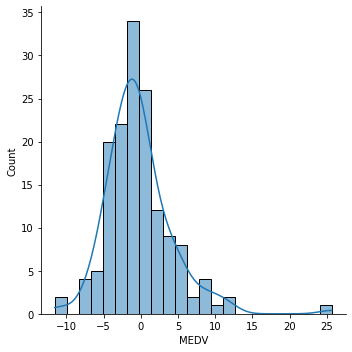

In [114]:
import seaborn as sns
sns.displot(y_test - prediction_lasso, kde = True)

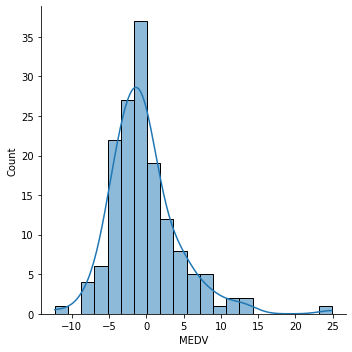

In [115]:
sns.displot(y_test - prediction_ridge, kde = True)